In [16]:
import typing as tp
import json
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
outputs_dir = Path('.').resolve().parent.parent.parent / "outputs"
log_file_path = outputs_dir / "2022-09-08/21-40-05/image_attention.log"

In [3]:
def load_records(log_path: Path) -> tp.List[tp.Dict[str, tp.Any]]:
    with open(log_path) as f:
        return [json.loads(line.rstrip()) for line in f]

In [4]:
log_records = load_records(log_file_path)
log_records = [record for record in log_records if record['message'] is None]

log_records_df = pd.json_normalize(log_records).drop(columns=['message', 'asctime'])
log_records_df.head()

,name,levelname,alpha,acc1,acc5,cache_strategy._target_,cache_strategy.topk,cache_value_strategy._target_,cache_weights_strategy._target_,cache_weights_strategy.beta
0,image_attention,INFO,0.1,55.988061,89.677901,summer_clip.clip_searcher.cache_strategy.TopKS...,1,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,0.1
1,image_attention,INFO,0.5,55.217013,89.105833,summer_clip.clip_searcher.cache_strategy.TopKS...,1,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,0.1
2,image_attention,INFO,1.0,52.219873,87.601045,summer_clip.clip_searcher.cache_strategy.TopKS...,1,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,0.1
3,image_attention,INFO,2.0,45.902251,81.644074,summer_clip.clip_searcher.cache_strategy.TopKS...,1,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,0.1
4,image_attention,INFO,3.0,39.708991,74.207188,summer_clip.clip_searcher.cache_strategy.TopKS...,1,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,0.1


In [5]:
visible_params = {'alpha', 'acc1', 'acc5', 'cache_strategy.topk', 'cache_weights_strategy.beta'}
static_columns = list(set(log_records_df.columns) - visible_params)
groups = list(log_records_df.groupby(static_columns))
print('# unique groups:', len(groups))

# unique groups: 1


In [6]:
static_values, part_df = groups[0]
static_items = dict(zip(static_columns, static_values))
static_items  # type: ignore

{'levelname': 'INFO',
 'name': 'image_attention',
 'cache_strategy._target_': 'summer_clip.clip_searcher.cache_strategy.TopKStrategy',
 'cache_value_strategy._target_': 'summer_clip.clip_searcher.cache_value_strategy.HardCacheStrategy',
 'cache_weights_strategy._target_': 'summer_clip.clip_searcher.cache_weights_strategy.TipAdapterWeightsStrategy'}

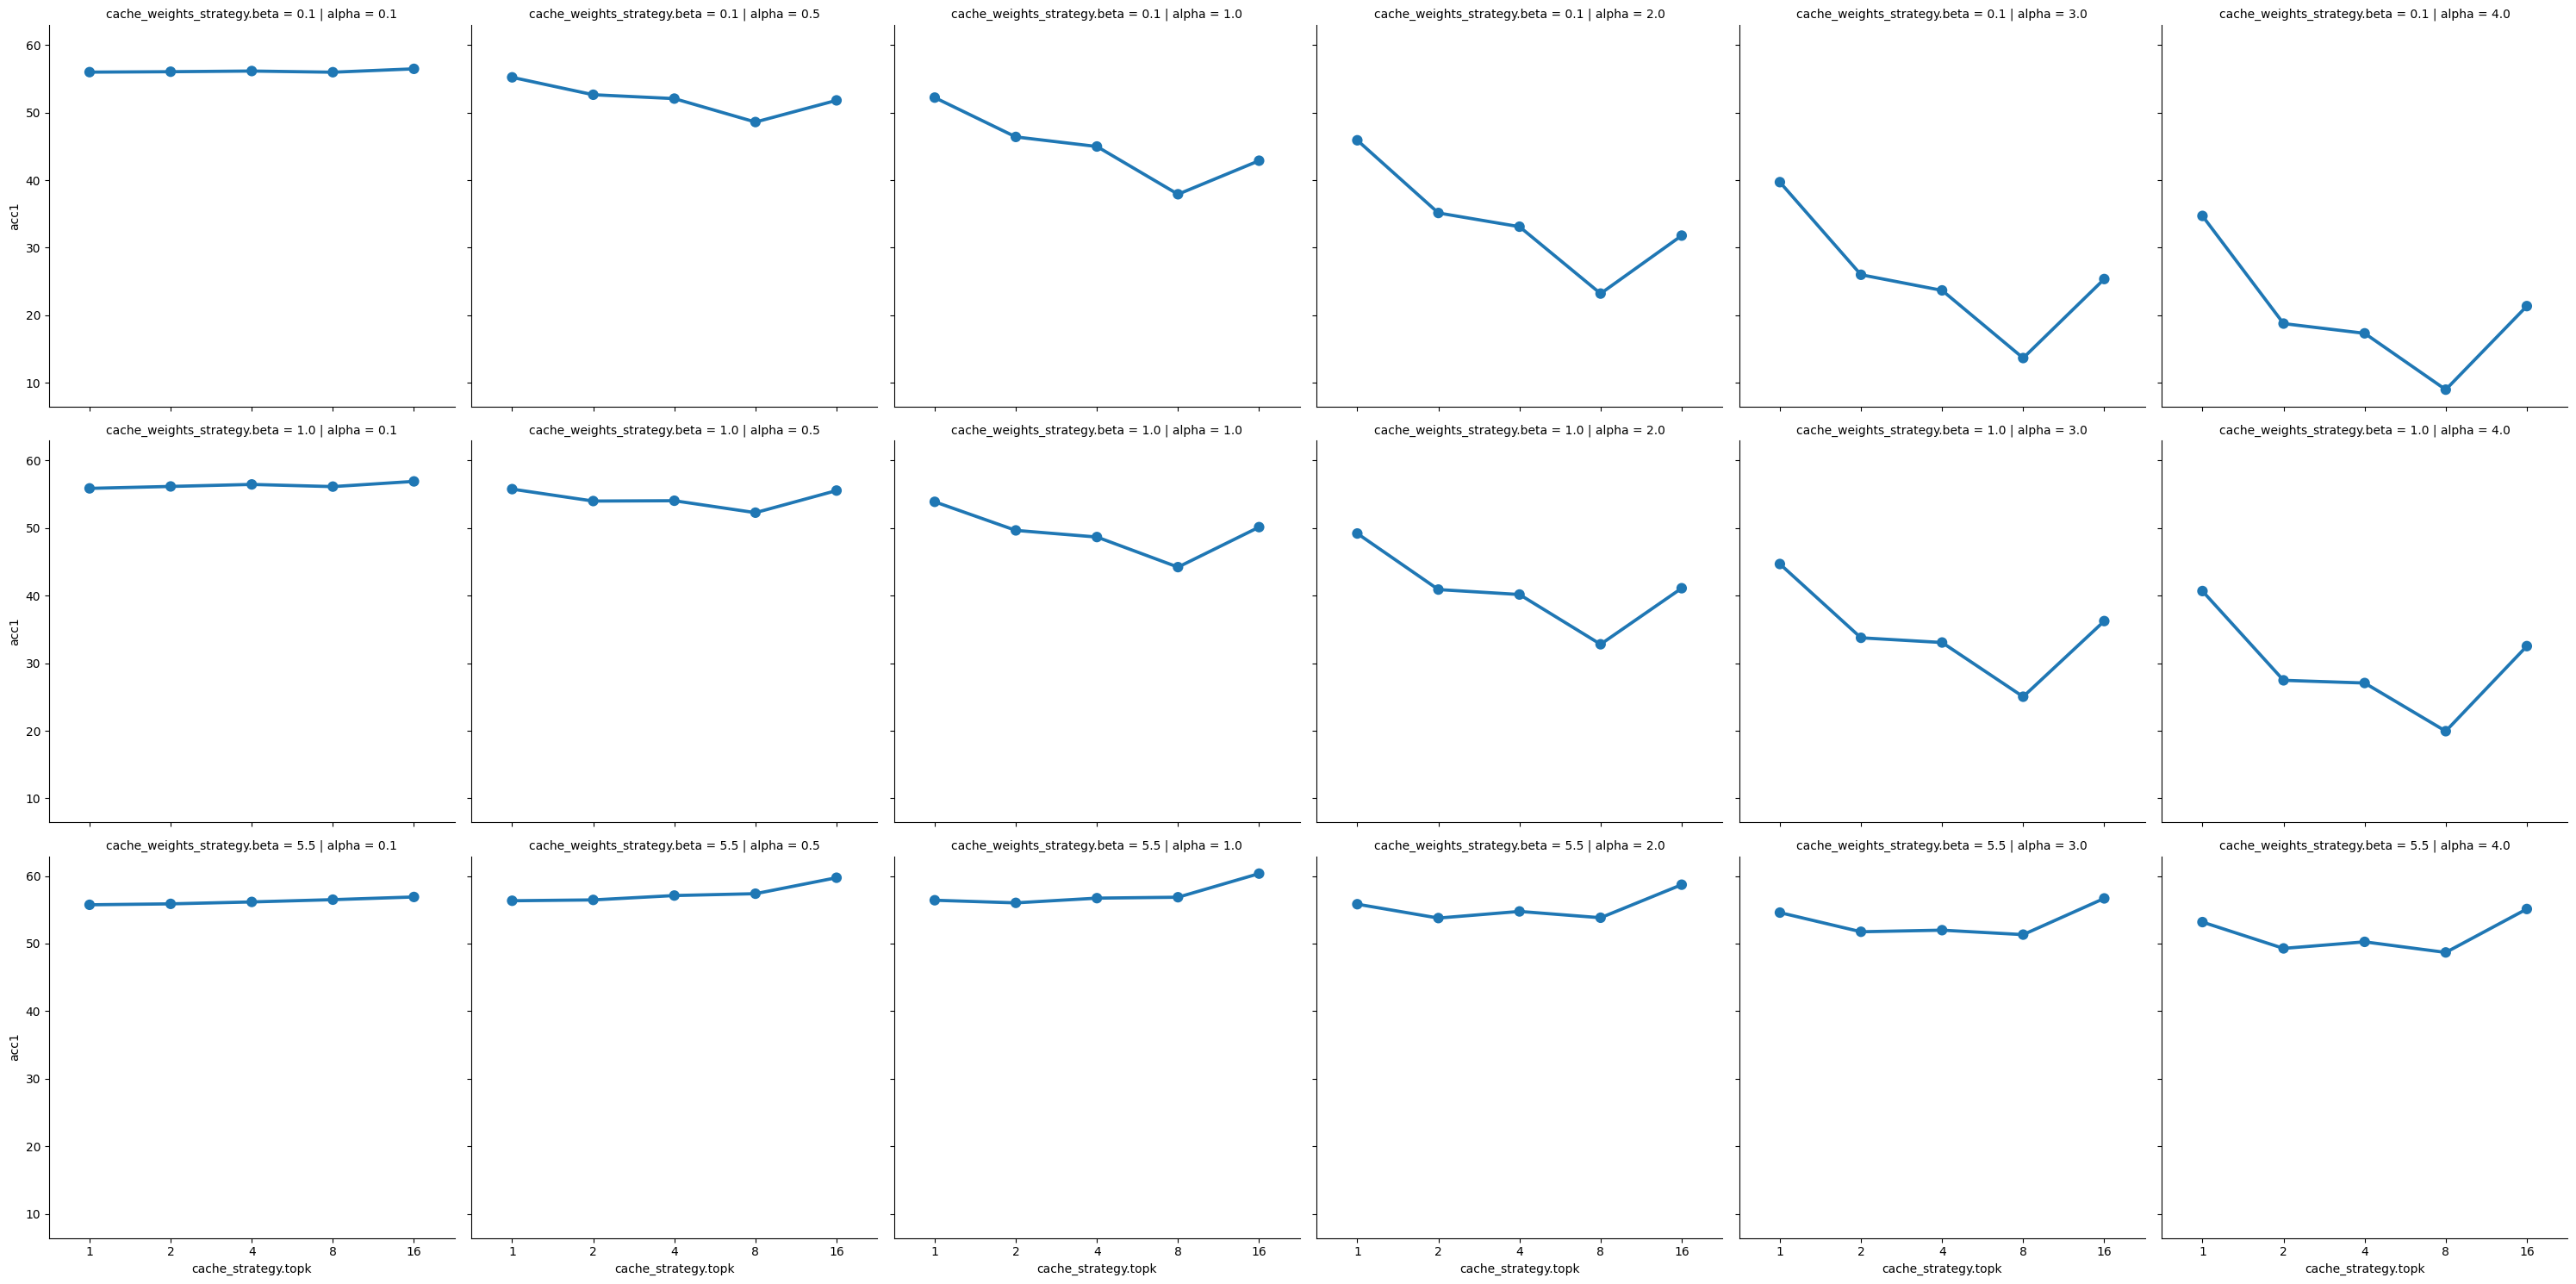

In [18]:
sns.catplot(data=part_df, x='cache_strategy.topk', y='acc1', col='alpha', row='cache_weights_strategy.beta', kind='point')
plt.savefig('data/clip_search_1.png')

In [20]:
log_records_df.sort_values('acc1', ascending=False).head()

,name,levelname,alpha,acc1,acc5,cache_strategy._target_,cache_strategy.topk,cache_value_strategy._target_,cache_weights_strategy._target_,cache_weights_strategy.beta
86,image_attention,INFO,1.0,60.353190,90.635493,summer_clip.clip_searcher.cache_strategy.TopKS...,16,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,5.5
85,image_attention,INFO,0.5,59.743813,90.660366,summer_clip.clip_searcher.cache_strategy.TopKS...,16,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,5.5
87,image_attention,INFO,2.0,58.711603,89.478921,summer_clip.clip_searcher.cache_strategy.TopKS...,16,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,5.5
67,image_attention,INFO,0.5,57.380923,89.963935,summer_clip.clip_searcher.cache_strategy.TopKS...,8,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,5.5
49,image_attention,INFO,0.5,57.107325,89.926626,summer_clip.clip_searcher.cache_strategy.TopKS...,4,summer_clip.clip_searcher.cache_value_strategy...,summer_clip.clip_searcher.cache_weights_strate...,5.5
